## What are Embeddings?
- Concept from Natural Language Processing (NLP)
- Numerical representation of text
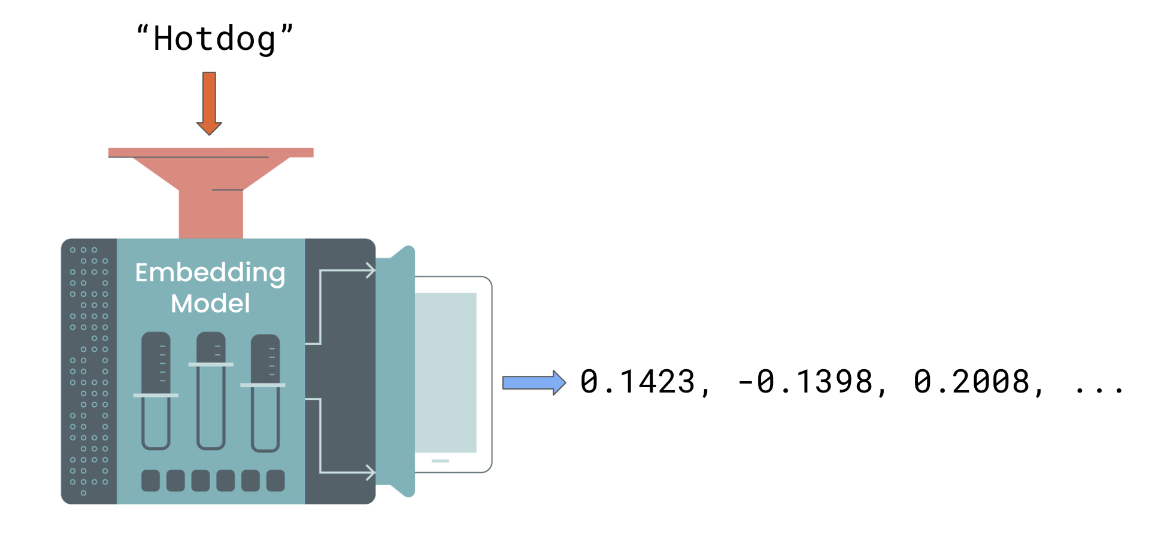

- Text is mapped onto a *multi-dimensional* **vector space**
- The numbers outputted by the model are the text's location in the space
- Similar words appear *closer together*
- Dissimilar words appear *further away*
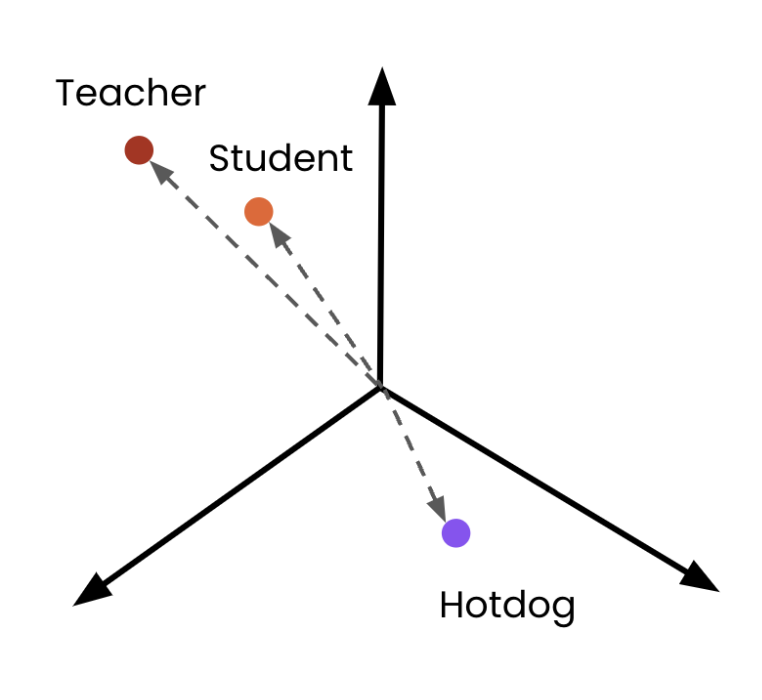

### Why are embeddings useful?
- Embeddings allow *semantic meaning* to be captured
- **Semantic meaning**: context and intent behind text
- Example:
  - "Which way is it to the supermarket?"
  - "Could I have directions to the shop?"

### Semantic search engines
Traditional search engines
- Use **keyword** pattern matching
- May miss the true intent
- Will miss word variations
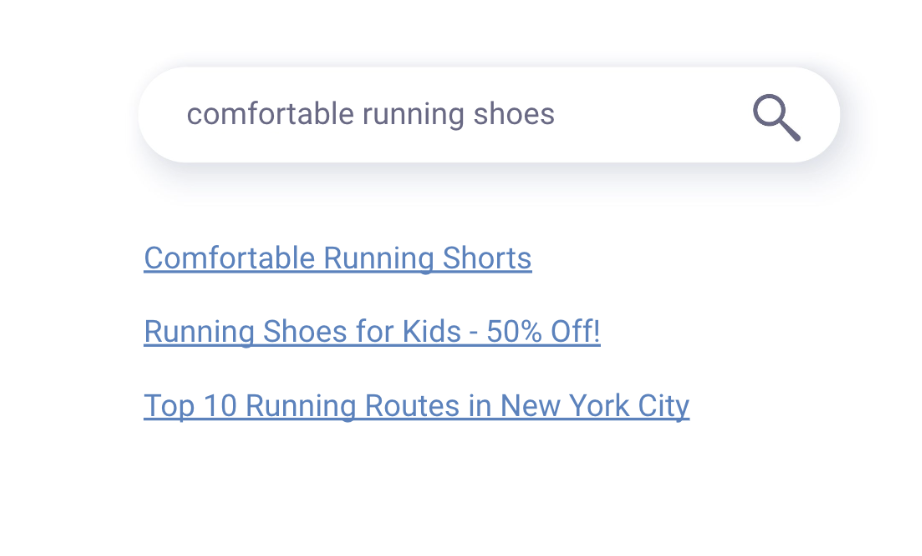

- Use **embeddings** to understand intent and context
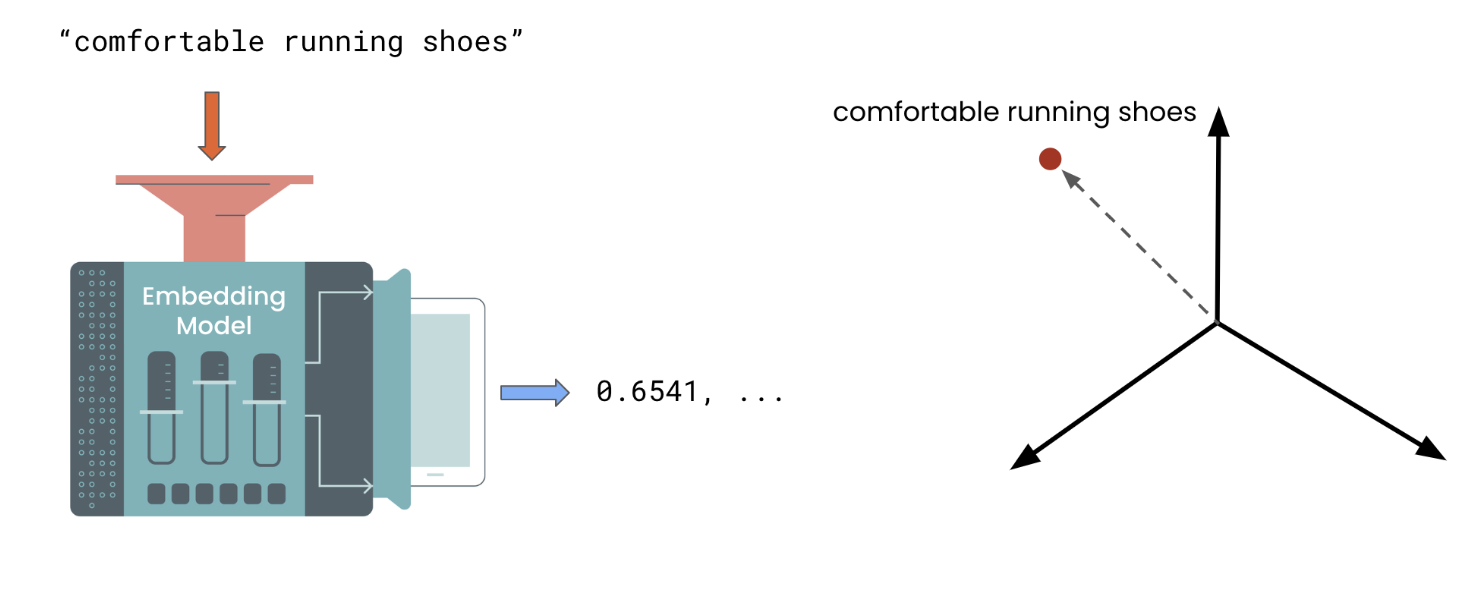

### Recommendation systems
Example: Job post recommendations
- Recommend jobs based on descriptions already viewed
- Mitigates variations in job title
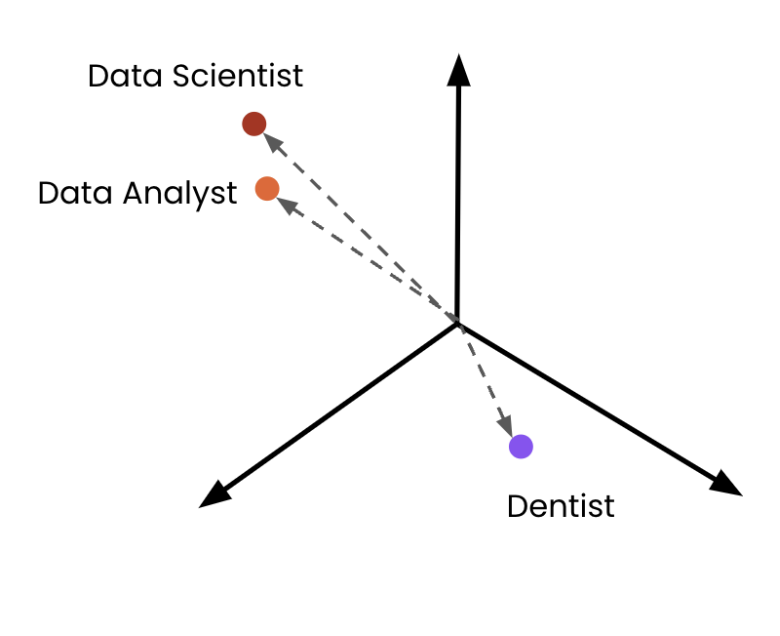

### Classification
Classification tasks:
- Classify sentiment
- Cluster observations
- Categorization
- Example: **Classifying news headlines**
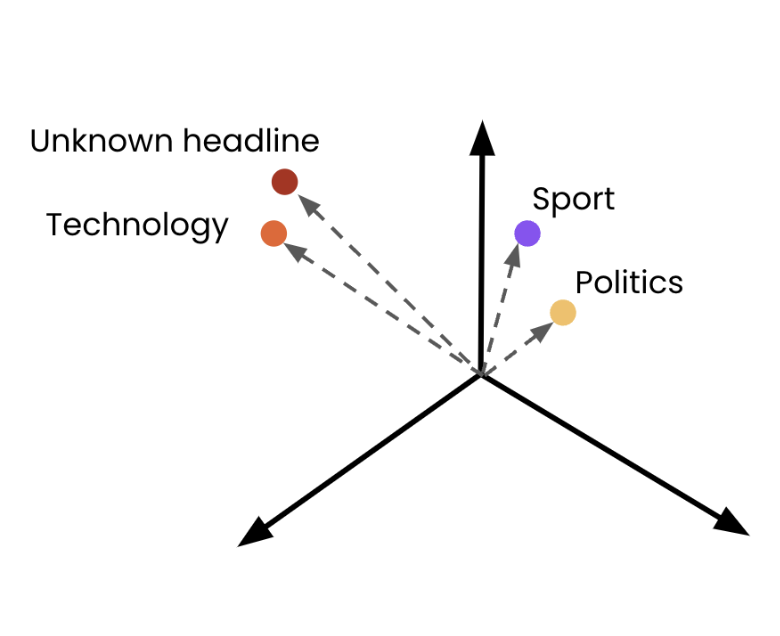

### Creating an Embeddings request
Embeddings endpoint

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="<OPENAI_API_KEY>")
response = client.embeddings.create( 
    model="text-embedding-3-small",
    input="""Embeddings are a numerical representation of text that can be used to measure the relatedness between 
    two pieces of text."""
)

response_dict = response.model_dump()
print(response_dict)

### Embeddings response
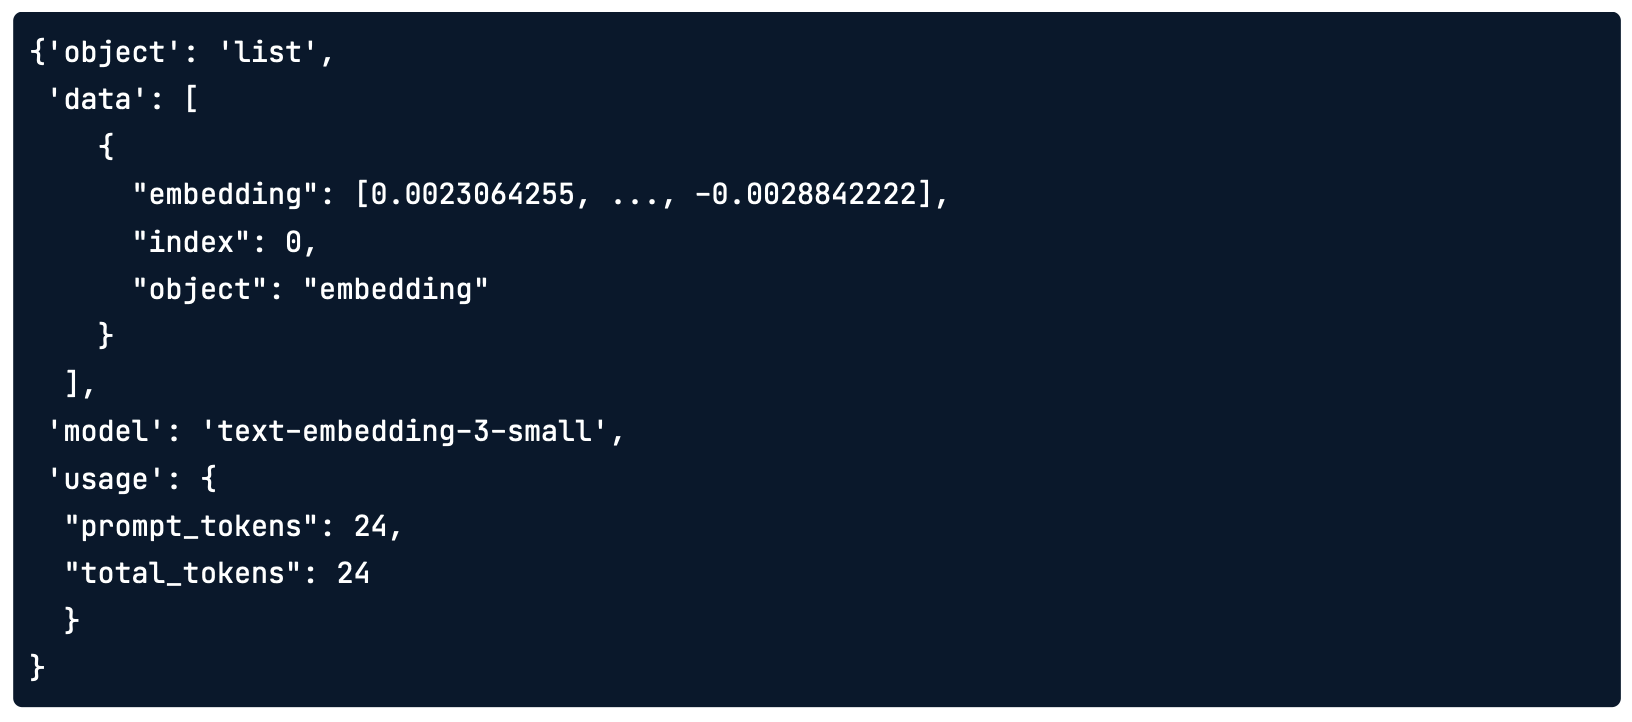

### Extracting the embeddings

In [ ]:
print(response_dict['data'][0]['embedding'])

# Output: [0.0023064255, ...., -0.0028842222]

In [ ]:
# Practice 1

# Create an OpenAI client
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to obtain embeddings
response = client.embeddings.create(
    model="text-embedding-3-small",
    input="""Today, I learned the concept of embeddings, its uses cases, how it works, and its importance in building impactful 
    AI systems. Next up, vector databases and RAG."""
)

# Convert the response into a dictionary
response_dict = response.model_dump()
print(response_dict)

In [ ]:
# Practice 2

# Extract the total_tokens from response_dict
print(response_dict['usage']['total_tokens'])

# Extract the embeddings from response_dict
print(response_dict['data'][0]['embedding'])

## Investigating the Vector Space

### Example: Embedding headlines

In [ ]:
articles = [  
    {"headline": "Economic Growth Continues Amid Global Uncertainty", "topic": "Business"},  
    {"headline": "Interest rates fall to historic lows", "topic": "Business"},  
    {"headline": "Scientists Make Breakthrough Discovery in Renewable Energy", "topic": "Science"},   
    {"headline": "India Successfully Lands Near Moon's South Pole", "topic": "Science"},  
    {"headline": "New Particle Discovered at CERN", "topic": "Science"}, 
    {"headline": "Tech Company Launches Innovative Product to Improve Online Accessibility", "topic": "Tech"},    
    {"headline": "Tech Giant Buys 49% Stake In AI Startup", "topic": "Tech"},  
    {"headline": "New Social Media Platform Has Everyone Talking!", "topic": "Tech"},  
    {"headline": "The Blues get promoted on the final day of the season!", "topic": "Sport"}, 
    {"headline": "1.5 Billion Tune-in to the World Cup Final", "topic": "Sport"}
]

### Example: Embedding headlines
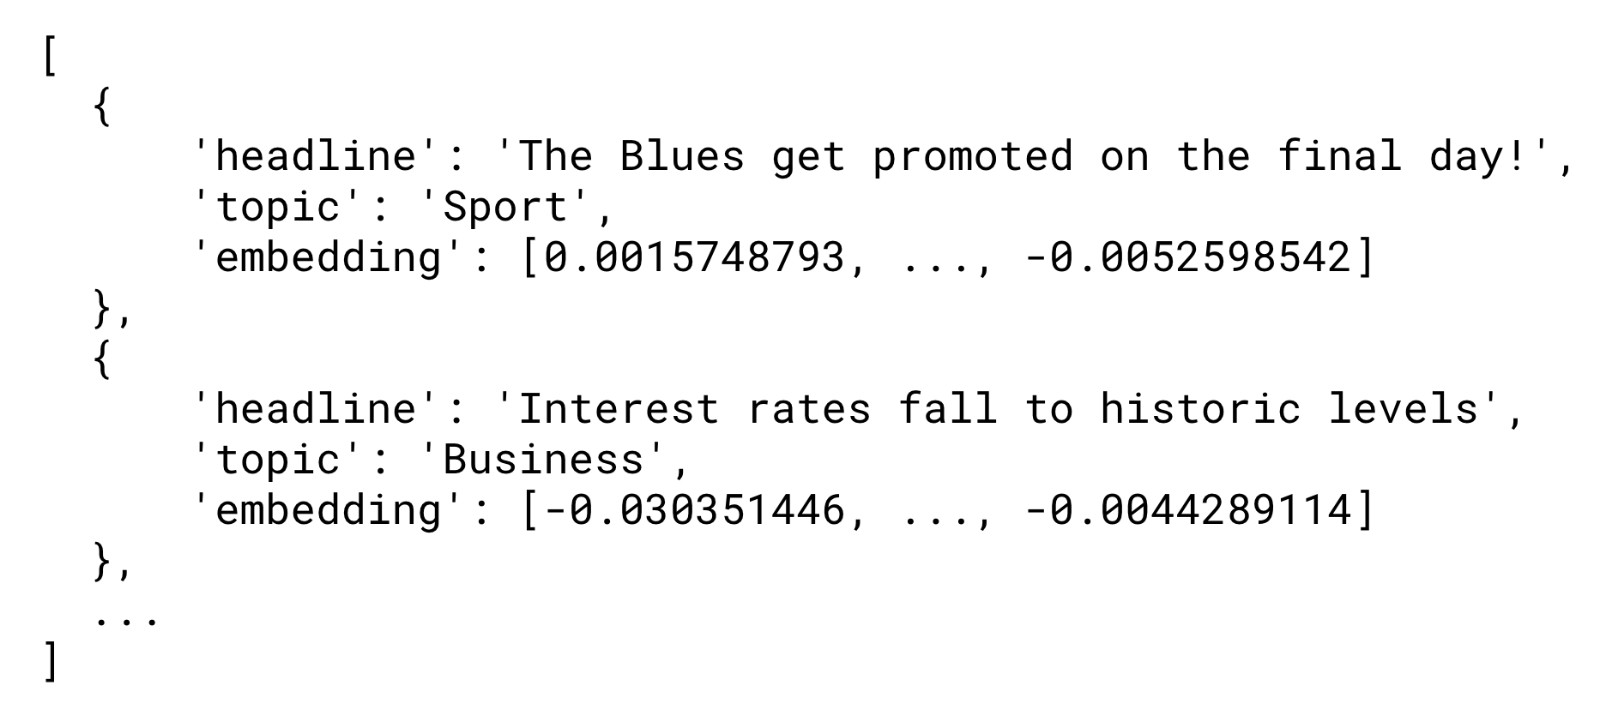

### Embedding multiple inputs

In [ ]:
headline_text = [article['headline'] for article in articles]
headline_text

### Output
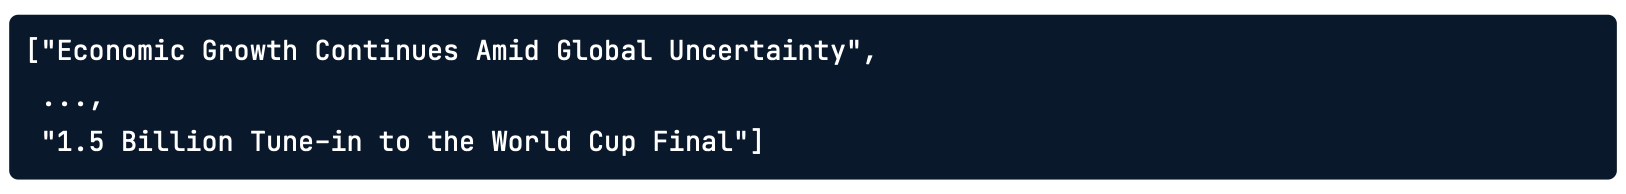

In [ ]:
response = client.embeddings.create( 
    model="text-embedding-3-small",
    input=headline_text
)

response_dict = response.model_dump()

**Batching** is more efficient than using multiple API calls

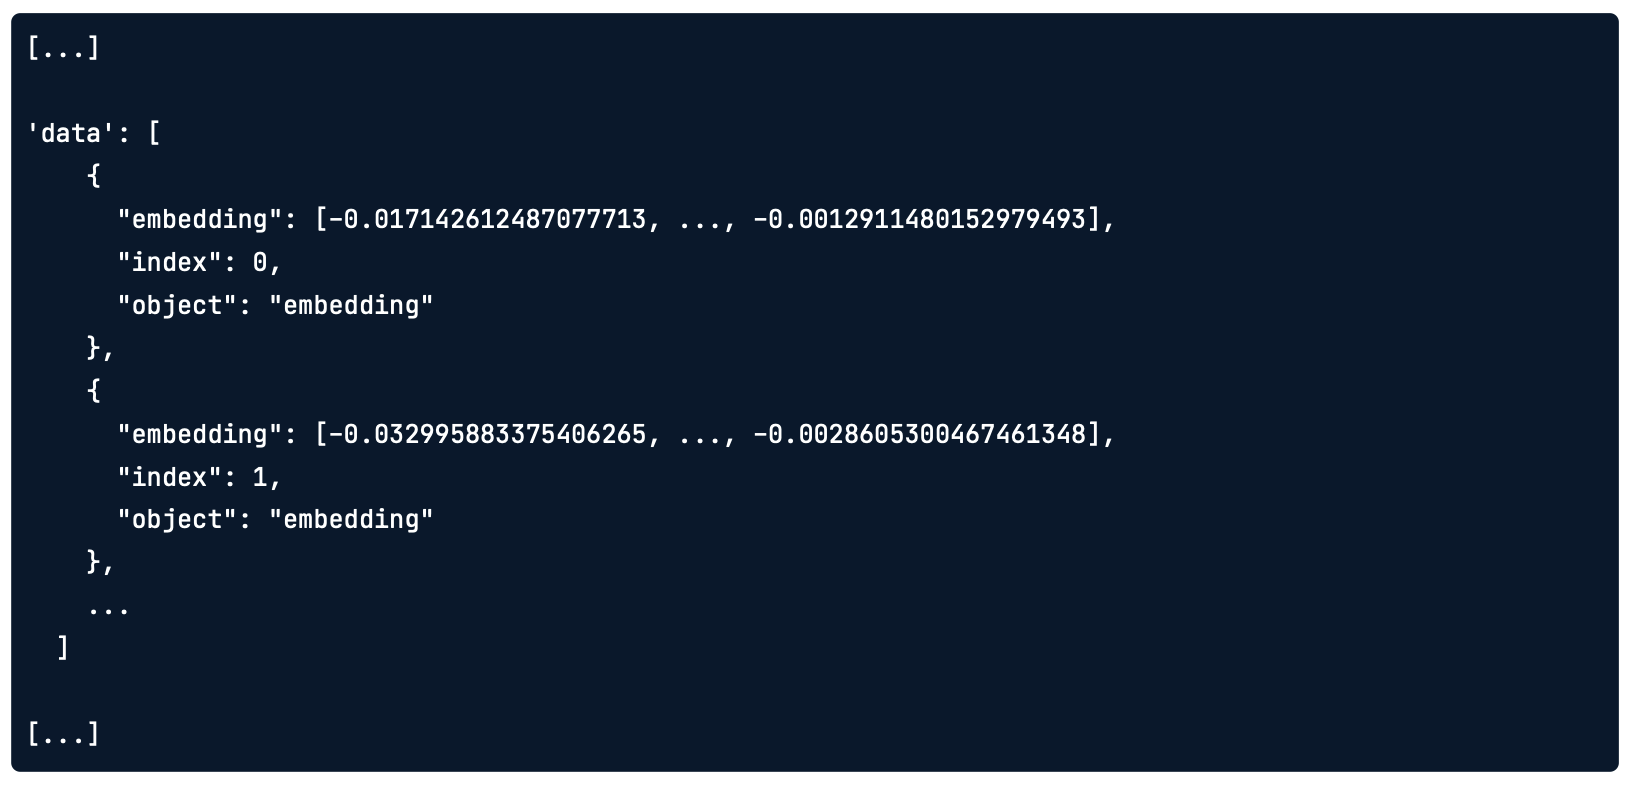

### Embedding multiple inputs

In [ ]:
articles = [  
    {"headline": "Economic Growth Continues Amid Global Uncertainty", "topic": "Business"},  
    ...
]

In [ ]:
for i, article in enumerate(articles):  
    article['embedding'] = response_dict['data'][i]['embedding']

print(articles[:2])

Code output:
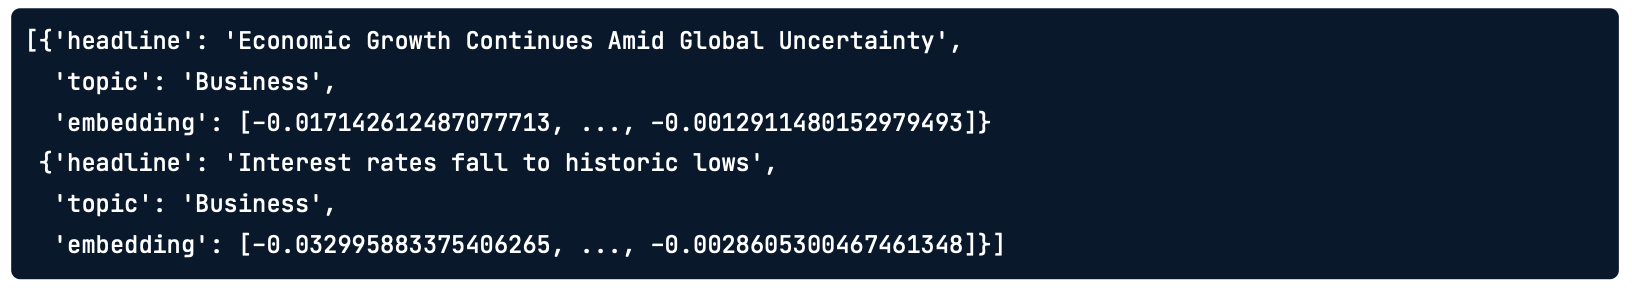

### How long is the embeddings vector?
- "Economic Growth Continues Amid Global Uncertainty"

In [ ]:
len(articles[0]['embedding'])

# Output: 1536 (That is its position or vector in the vector space)

- "Tech Company Launches Innovative Product to Improve Accessibility"

In [ ]:
len(articles[5]['embedding'])

# Output: 1536
# OpenAI Text-Embedding 3 always returns 1536

### Dimensionality reduction and t-SNE
- Various techniques to *reduce the number* of dimensions
- **t-SNE (t-distributed Stochastic Neighbor Embedding)**

### Implementing t-SNE

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embeddings = [article['embedding'] for article in articles]
tsne = TSNE(n_components=2, perplexity=5)

embeddings_2d = tsne.fit_transform(np.array(embeddings))

- `n_components`: the resulting number of dimensions
- `perplexity`: used by the algorithm, must be less than number of data points
- **Will result in information loss**

### Visualizing the embeddings

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
topics = [article['topic'] for article in articles]

for i, topic in enumerate(topics):   
    plt.annotate(topic, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.show()

- Similar articles are grouped together!
- Model captured the semantic meaning
- Coming up: **Computing similarity**

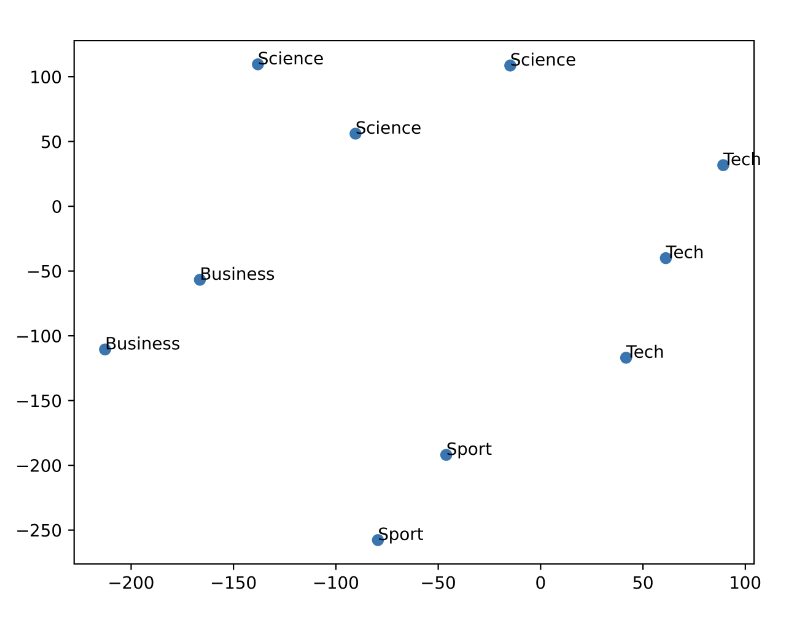

In [ ]:
# Practice 3

# Extract a list of product short descriptions from products
product_descriptions = [product['short_description'] for product in products]

# Create embeddings for each product description
response = client.embeddings.create(
    model="text-embedding-3-small",
    input=product_descriptions
)
response_dict = response.model_dump()

# Extract the embeddings from response_dict and store in products
for i, product in enumerate(products):
    product['embedding'] = response_dict['data'][i]['embedding']
    
print(products[0].items())

In [ ]:
# Practice 4

# Create reviews and embeddings lists using list comprehensions
categories = [product['category'] for product in products]
embeddings = [product['embedding'] for product in products]

# Reduce the number of embeddings dimensions to two using t-SNE
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

# Create a scatter plot from embeddings_2d
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, category in enumerate(categories):
    plt.annotate(category, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.show()

## Text Similarity

### To recap:
- Semantically similar texts are embedded more closely in the vector space
- Measuring distance allows us to measure similarity
- Enables embeddings applications:
   - Semantic search
   - Recommendations
   - Classification
     
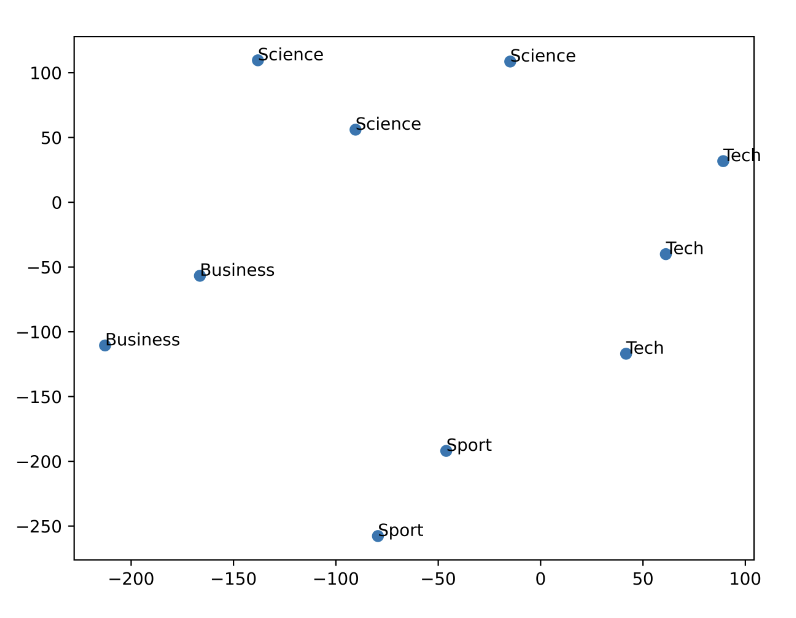

### Measuring similarity
- **Cosine distance**

In [ ]:
from scipy.spatial import distance

distance.cosine([0, 1], [1, 0])

# Output: 1.0

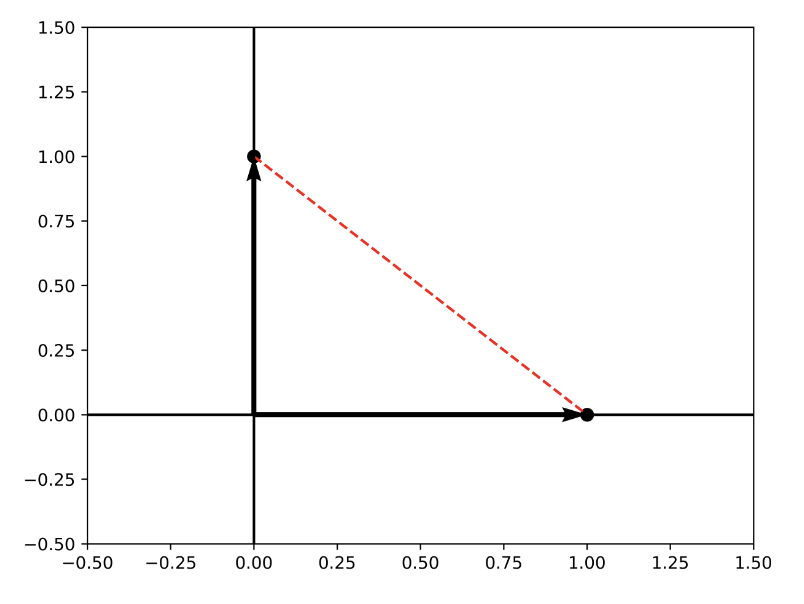

- **Ranges from 0 to 2**
- **Smaller numbers = Greater similarity**

### Example: Comparing headline similarity
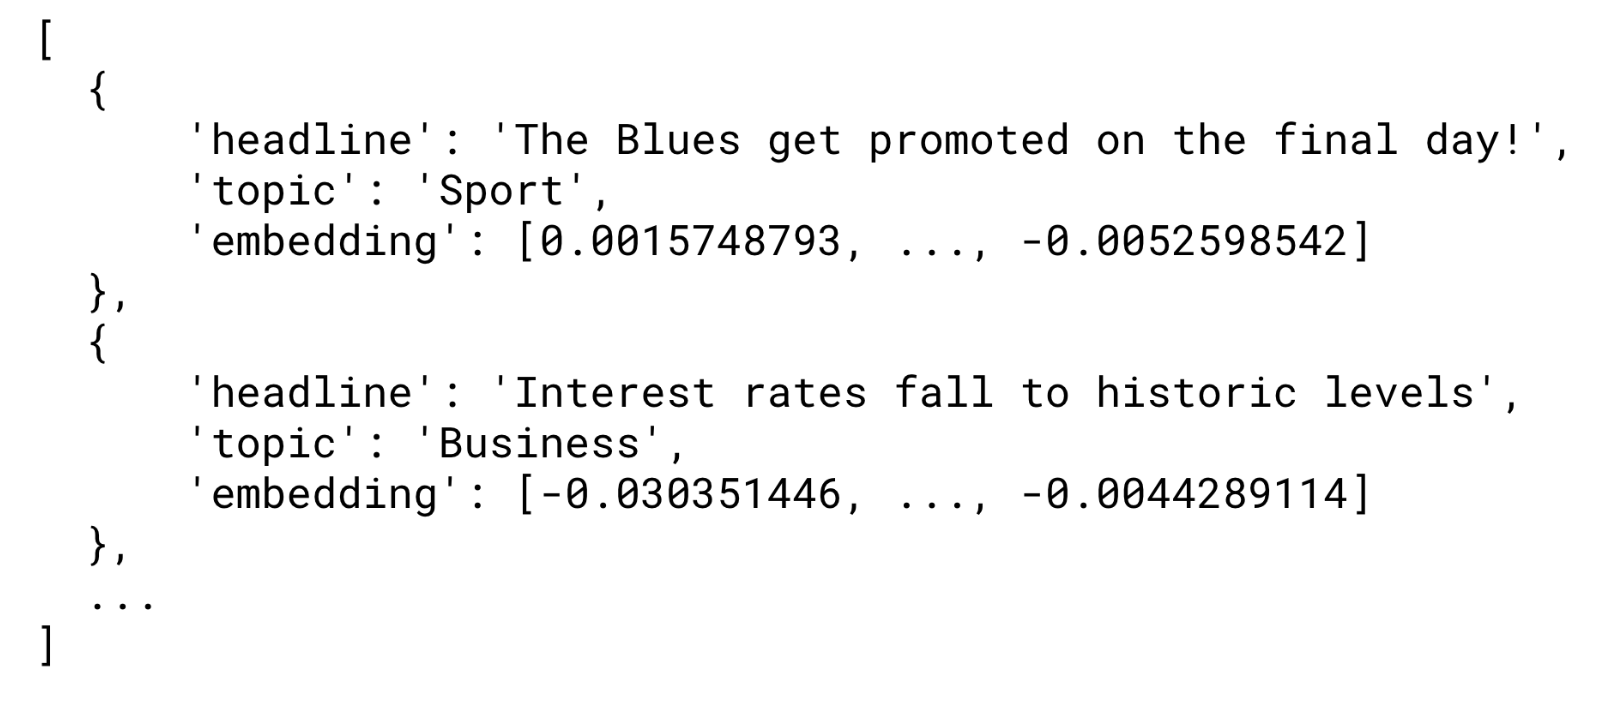

In [ ]:
def create_embeddings(texts):  
    response = client.embeddings.create(  
        model="text-embedding-3-small",
        input=texts 
    )  
    
    response_dict = response.model_dump()
    return [data['embedding'] for data in response_dict['data']]

In [ ]:
print(create_embeddings(["Python is the best!", "R is the best!"]))
print(create_embeddings("DataCamp is awesome!")[0])

# Output: [[0.0050565884448587894, ..., , -0.04000323638319969], 
# [-0.0018890155479311943, ..., -0.04085670784115791]][0.00037010075175203383, ..., -0.021759100258350372]

In [ ]:
from scipy.spatial import distance
import numpy as np

search_text = "computer"
search_embedding = create_embeddings(search_text)[0]

distances = []
for article in articles:  
    dist = distance.cosine(search_embedding, article["embedding"]) 
    distances.append(dist)

min_dist_ind = np.argmin(distances)
print(articles[min_dist_ind]['headline'])

# Output: Tech Company Launches Innovative Product to Improve Online Accessibility

In [ ]:
# Practice 5

# Define a create_embeddings function
def create_embeddings(texts):
  response = client.embeddings.create(
    model="text-embedding-3-small",
    input=texts
  )
  response_dict = response.model_dump()
  
  return [data['embedding'] for data in response_dict['data']]

# Embed short_description and print
print(create_embeddings(short_description)[0])

# Embed list_of_descriptions and print
print(create_embeddings(list_of_descriptions)[0])

In [ ]:
# Practice 6

# Embed the search text
search_text = "soap"
search_embedding = create_embeddings(search_text)[0]

distances = []
for product in products:
  # Compute the cosine distance for each product description
  dist = distance.cosine(search_embedding, product['embedding'])
  distances.append(dist)

# Find and print the most similar product short_description    
min_dist_ind = np.argmin(distances)
print(products[min_dist_ind]['short_description'])

# Output: Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.